In [1]:
# Import libraries
import os,cv2
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K 
from keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn
import matplotlib.pyplot as plt

#from keras.optimizers import SGD,RMSprop,adam
K.set_image_data_format('channels_last')
#%%
#SOMEWHAT RELATED TO PATH
PATH = 'C:/Users/lovel/Downloads/HAR Project/HAR Project/MLCNN'
# Define data path
data_path = PATH + '/RRNN/1'
data_dir_list = os.listdir(data_path)
img_rows=224
img_cols=224
num_channel=1
num_epoch=160

# Define the number of classes
num_classes = 5

img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(224,224))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

if num_channel==1:
	if K.image_data_format=='channels_last':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=3) 
		print (img_data.shape)
		
else:
	if K.image_data_format=='channels_last':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		



ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:


# Assigning Labels

# Define the number of classes
num_classes = 5

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:1019]=0
labels[1020:1589]=1
labels[1590:2250]=2
labels[2251:3088]=3
labels[3089:]=4
	  
names = ['carry','clapHands','pickUp','walk','waveHands']
	  
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)



In [11]:

# Defining the model
input_shape=img_data[0].shape
					
model = Sequential()
model.add(Conv2D(8,3,padding="same", input_shape = (224,224,1))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(12,3,padding="same")) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(24,3,padding="same")) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))  
opt = Adam(lr=0.001,decay=0.000005/num_epoch)
#build your own cnn
""" model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])"""
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])

# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 8)       80        
_________________________________________________________________
activation_5 (Activation)    (None, 224, 224, 8)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 12)      876       
_________________________________________________________________
activation_6 (Activation)    (None, 112, 112, 12)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 12)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 24)       

True

Epoch 1/160
159/159 [==============================] - 41s 252ms/step - loss: 1.2980 - accuracy: 0.5531 - val_loss: 1.1117 - val_accuracy: 0.5730
Epoch 2/160
159/159 [==============================] - 40s 249ms/step - loss: 1.0476 - accuracy: 0.6125 - val_loss: 0.9484 - val_accuracy: 0.5630
Epoch 3/160
159/159 [==============================] - 41s 261ms/step - loss: 0.9312 - accuracy: 0.6198 - val_loss: 0.7926 - val_accuracy: 0.6385
Epoch 4/160
159/159 [==============================] - 38s 239ms/step - loss: 0.8012 - accuracy: 0.6646 - val_loss: 0.6915 - val_accuracy: 0.6851
Epoch 5/160
159/159 [==============================] - 38s 238ms/step - loss: 0.7144 - accuracy: 0.6718 - val_loss: 0.6230 - val_accuracy: 0.7091
Epoch 6/160
159/159 [==============================] - 38s 238ms/step - loss: 0.6689 - accuracy: 0.7037 - val_loss: 0.5252 - val_accuracy: 0.7834
Epoch 7/160
159/159 [==============================] - 38s 241ms/step - loss: 0.5764 - accuracy: 0.7445 - val_loss: 0.5042 -

Epoch 57/160
159/159 [==============================] - 38s 241ms/step - loss: 0.2167 - accuracy: 0.9054 - val_loss: 0.2278 - val_accuracy: 0.9433
Epoch 58/160
159/159 [==============================] - 39s 244ms/step - loss: 0.2477 - accuracy: 0.8922 - val_loss: 0.2275 - val_accuracy: 0.9496
Epoch 59/160
159/159 [==============================] - 38s 242ms/step - loss: 0.2554 - accuracy: 0.8936 - val_loss: 0.2688 - val_accuracy: 0.9433
Epoch 60/160
159/159 [==============================] - 39s 247ms/step - loss: 0.2452 - accuracy: 0.8971 - val_loss: 0.2641 - val_accuracy: 0.9370
Epoch 61/160
159/159 [==============================] - 39s 246ms/step - loss: 0.2394 - accuracy: 0.8993 - val_loss: 0.2483 - val_accuracy: 0.9345
Epoch 62/160
159/159 [==============================] - 39s 242ms/step - loss: 0.2343 - accuracy: 0.9012 - val_loss: 0.2644 - val_accuracy: 0.9446
Epoch 63/160
159/159 [==============================] - 39s 242ms/step - loss: 0.2138 - accuracy: 0.9089 - val_loss: 0

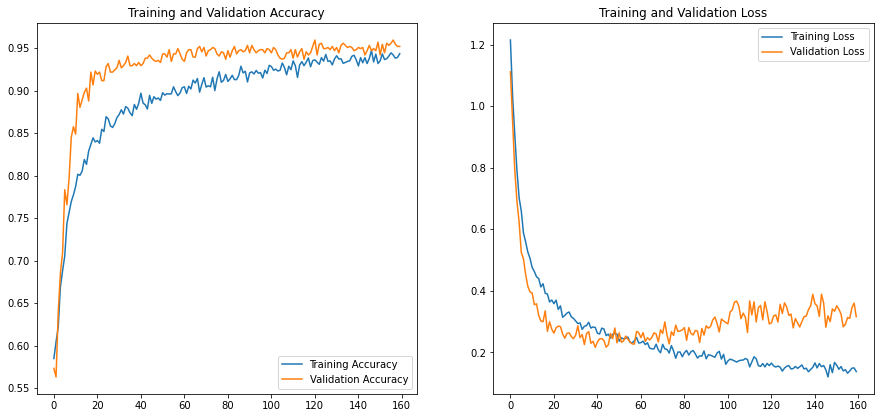

In [12]:
# Training
hist = model.fit(X_train, y_train, batch_size=20, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

#hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=20,verbose=1, validation_split=0.2)'
# Training with callbacks

#visualize 2
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(160)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Confusion matrix, without normalization
[[ 50   1   0   0   9]
 [  0  43   1   0   1]
 [  2   0 134   3   6]
 [  1   0   2  96   4]
 [  0   3   1   4 433]]


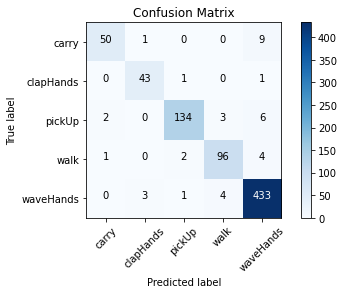

In [13]:

predictions = model.predict(X_test, batch_size=20, verbose=0)  
rounded_predictions = np.argmax(predictions, axis=-1)
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test.argmax(axis=1), y_pred=rounded_predictions)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm_plot_labels = ["carry","clapHands","pickUp","walk","waveHands"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')